# 7/11/2022
### YOLOv5 on Video
To do YOLOv5 inferencing on a video, just follow the same exact steps as on an image, but when you run `python detect.py`, pass in a video path instead of an image path (i.e., you might run <br>`!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.05 --source /content/Mica_Video.mp4`). To view this inference video, just view the MP4 file that gets saved when you run `detect.py`.

If you have a bunch of image frames that you need to turn into a video, then go to Microsoft video editor app, upload all the image frames, and drag them all to the storyboard at the bottom. Then do ctrl + A to select them all in the storyboard and set their durations to 0.03 seconds (this will make it 30 frames per second). Then export the video - it will come out as an mp4 file.

# 7/12/2022
### OpenCV tutorial

Fundamental parts of image processing include the following:
* __Image Thresholding__, where all pixels are converted to either black or white depending on whether their values are above or below a threshold.
* __Image Filtering__, where images have their shades or colors changed or their brightness/contrast increased. Matrices just like those used in Convolutional Neural Networks can be used here, and they are known as filters.
* __Layer Padding__, where extra pixels are added to the sides of an image to prevent the loss of information
* __Connected components__, where continuous structures of pixels (such as single objects) are grouped based off pixel connectivity. 

# 7/13/2022
### Thresholding
_https://www.youtube.com/watch?v=jXzkxsT9gxM_
Now, let's do some image processing with this. Let's say our task is to make an obscured and hard to read book page a more readable format using thresholding. The first thing we have to do is import our libraries and load in our image:

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('bookpage.jpg')                 # Reads in the image from file path

In [ ]:
cv2.imshow('image', img)                         # Displays image `img` using window name "image"
cv2.waitKey(0)                                   # Wait for any key press
cv2.destroyAllWindows()                          # Destroy windows once the key press goes through

Now, let's do our threshold using the `cv2.threshold()` function, which takes in the image data, threshold value, maximum pixel value, and thresholding type. Since our image is low-light, let's set the threshold value to 12, meaning that all pixels with value greather than 12 will become white and all pixels less than 12 will become black. We set our max value to 255 as that is the max pixel value, and we will set our thresholding type to `cv2.THRESH_BINARY`:

In [8]:
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)

In [9]:
cv2.imshow('threshold image', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

We get the following image as output:
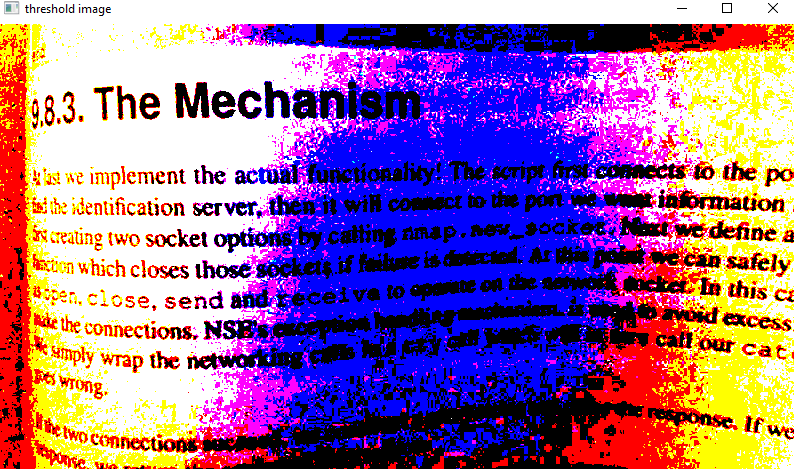

Here, since we are dealing with a color image, each pixel value is set to either 0 or 255 - this includes RGB values, so we see a few yellow, blue, red, and purple pixels along with the white and black. To get this to work in a more ideal way, we can convert the whole image to grayscale before applying the threshold in order to make everything black and white. 

To do this, we can use the `cv2.cvtColor()` function which takes in the image to convert and the color style to convert it with - in our case, we are going from a BGR color scheme (similar to RGB) to a grayscale scheme:

In [10]:
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

We then run the threshold on this image:

In [11]:
retval2, threshold2 = cv2.threshold(grayscale_img, 12, 255, cv2.THRESH_BINARY)

In [12]:
cv2.imshow('new threshold image', threshold2)
cv2.waitKey(0)
cv2.destroyAllWindows()

We get this as output:
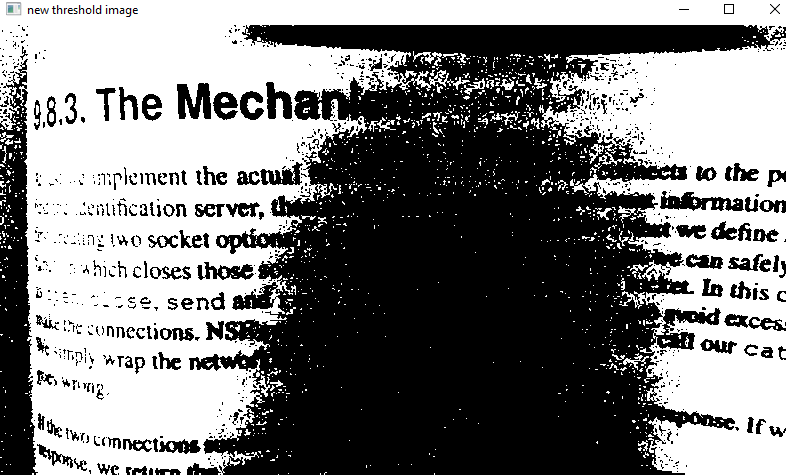

Now, the problem is that we have the left side as too bright and the middle side as completely black. To solve this, we can use what is called a __Gaussian adaptive threshold__ which is adaptive based on what region we are in. To do this, we will use the `cv2.adaptiveThreshold()` function, which takes in the following inputs:
* `src`: Image source, grayscale_img
* `maxValue`: Maximum pixel value, 255
* `adaptiveMethod`: Adaptive thresholding algorithm to use, cv2.ADAPTIVE_THRESH_GAUSSIAN_C
* `thresholdType`: Type of threshold we will use, cv2.THRESH_BINARY
* `blockSize`: Size of a pixel "neighborhood" which is used to calculate the threshold value of the pixels in that area, 115
* `C`: Constant subtracted from the weighted mean, 1

In [14]:
gauss = cv2.adaptiveThreshold(grayscale_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

In [15]:
cv2.imshow('gaussian threshold image', gauss)
cv2.waitKey(0)
cv2.destroyAllWindows()

We get this as our output:
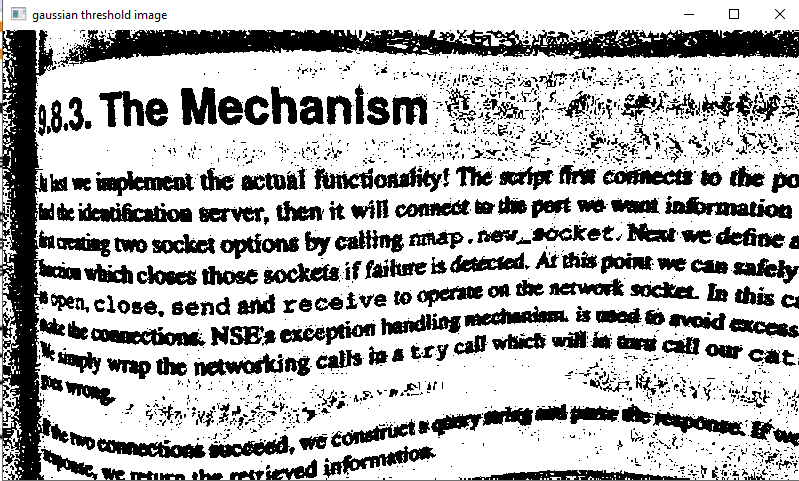

This is looking a lot better than the previous ones, and is pretty much readable now!

### Color Filtering
_https://www.youtube.com/watch?v=CCOXg75HkvM_

To do color filtering (basically removing or editing one color or another or increasing hue of one or another), we will start by importing our libraries:

In [1]:
import cv2
import numpy as np

Then, we define a video capture object, passing in the camera number (in our case 0 as we only have one webcam attached)

In [2]:
cap = cv2.VideoCapture(0)

Now, we run a while loop that grabs a frame from the video capture object by using `cap.read()`. We then convert this frame into the HSV (hue, saturation, value) format using `cvtColor`. We use HSV because of the nature of how it works for range.

We will be holding up a bright red pouch, so we will first define our lower and upper bounds for what the color red will look like as an array, using 0,0,0 and 255,255,255.

Then, we create a mask by providing the image and the pixel values for the lower bound and upper bound. We then run a bitwise_and, basically making it so that all pixels that lie within the mask range will be displayed and all those that do not will become black. Since our lower is 0,0,0 and our upper is 255,255,255, all things will be displayed. 

We then display the frame, mask, and result of the color mask.

We then have a wait key so that it will stop if a key is pressed, and windows will then be destroyed and the webcam let go of.

In [9]:
cap = cv2.VideoCapture(0)                                  # Reopening the cap so that the cell can be run multiple times over

while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([0,0,0])
    upper_red = np.array([255,255,255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('result', res)
    
    k = cv2.waitKey(5) & 0xFF                               # The end part extracts the 8 bits that are useful out of the output
    if k == 27:                                             # This code has it so that when the esc key is pressed specifically,
        break                                               # the loop exits.

    
cv2.destroyAllWindows()
cap.release()

Now that we've done all this, we can work on filtering. To do this, we will have to use trial and error to set the lower and upper reds to values that only keep the red pouch. Using what we know about hue, saturation, and value colors, we can do trial and error to get a hue range of 150 to 255, a saturation range of 150 to 255, and a value range of 50 to 255:

In [20]:
cap = cv2.VideoCapture(0)                                  # Reopening the cap so that the cell can be run multiple times over

while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([150,150,50])
    upper_red = np.array([255,255,255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('result', res)
    
    k = cv2.waitKey(5) & 0xFF                               # The end part extracts the 8 bits that are useful out of the output
    if k == 27:                                             # This code has it so that when the esc key is pressed specifically,
        break                                               # the loop exits.

    
cv2.destroyAllWindows()
cap.release()

We get the following result!
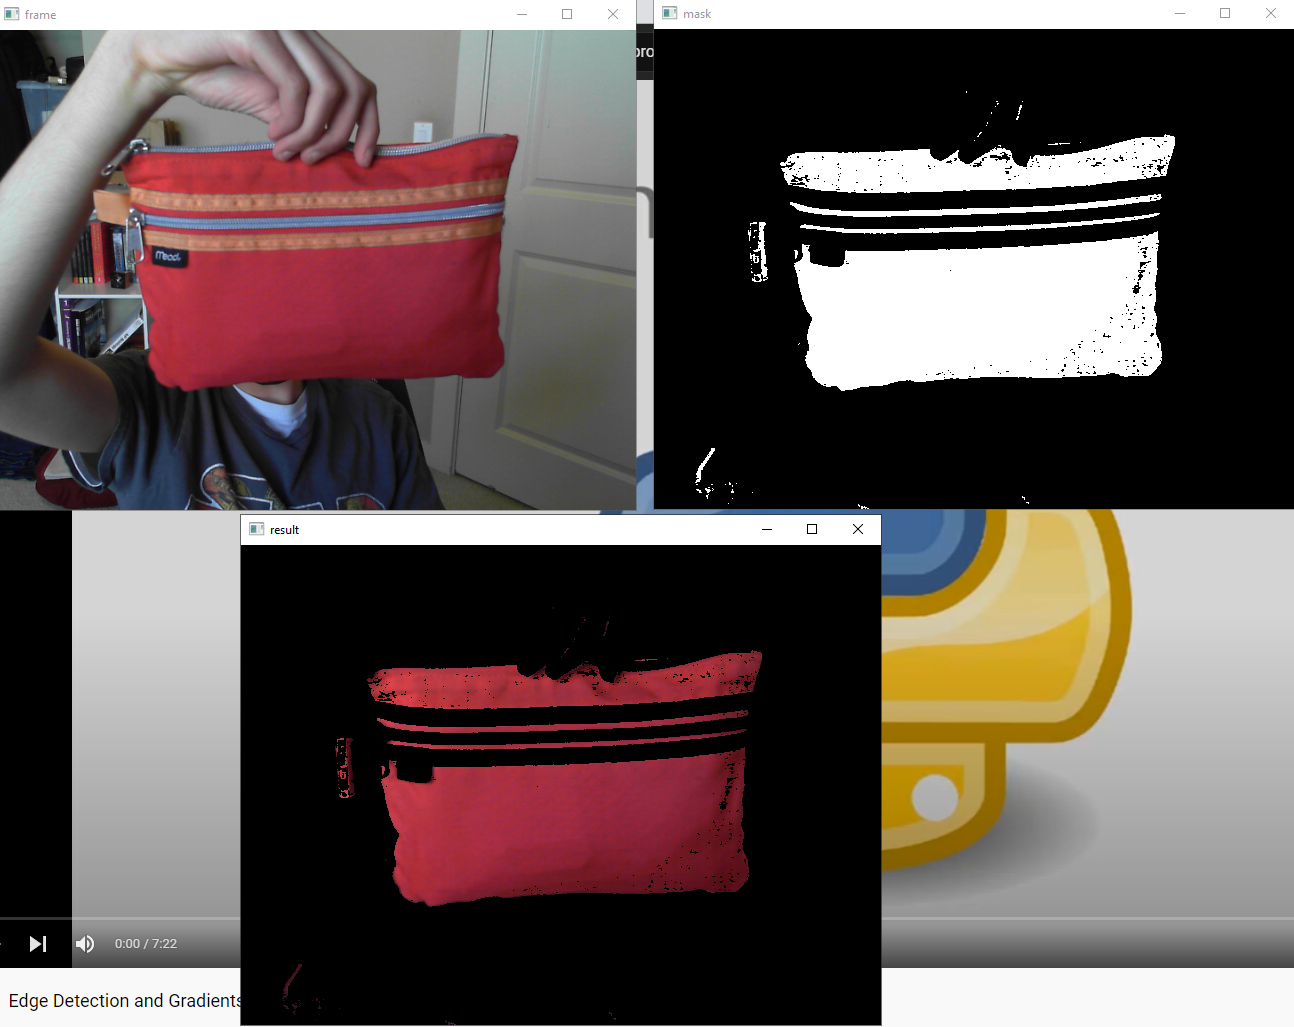

# 7/14/2022
### Azure Percept Info

Azure Percept basically combines all of the parts of services such as Azure IoT to deploy AI models on the edge. It also uses Azure AI tools such as Custom Vision and Azure Stream Analytics. Basically, it accelerates the journey to make Azure AI-ready devices, develop applications on Azure, and leverage turnkey SaaS solutions. It is the glue between the different Azure services such as IoT hub and Cognitive Skills.
